<a href="https://colab.research.google.com/github/Gus-Victrix/starting_data/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (There can be multiple options)

## 1. Make classification data and get it ready

In [ ]:
import sklearn
sklearn.__version__, print(sklearn.__doc__)


Machine learning module for Python

sklearn is a Python module integrating classical machine
learning algorithms in the tightly-knit world of scientific Python
packages (numpy, scipy, matplotlib).

It aims to provide simple and efficient solutions to learning problems
that are accessible to everybody and reusable in various contexts:
machine-learning as a versatile tool for science and engineering.

See http://scikit-learn.org for complete documentation.



('1.2.2', None)

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)


In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f'First 5 samples\n\t{X[:5]}\n\n\t{y[:5]}')

First 5 samples
	[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

	[1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


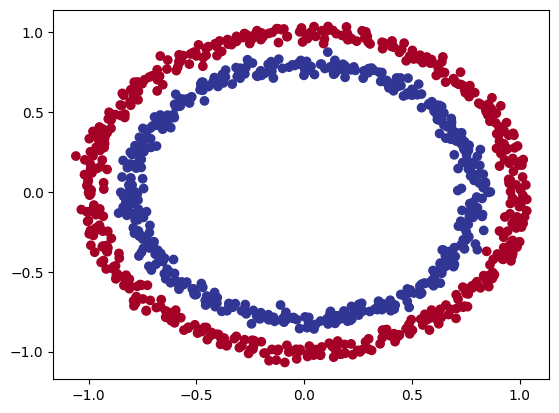

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(
    x=X[:, 0],
    y=X[:, 1],
    c=y,
    cmap=plt.cm.RdYlBu
);

**Note:** This is a toy data-set for practice problems

### 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample, y_sample = X[0], y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.1.0+cu121'

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
type(X), type(y), X.dtype, y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42
)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots

To do so, we want to:
1. Device agnostic code setup (GPU if available)
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop.

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Make device agnostic code
device  = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now the code can be devie agnostic, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data.
3. Defines a `forward()` method that outlines the forward pass of the model
4. Instantiate and instance of our model and send it to target `device`

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
# 1. Constructing the model
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 and outputs 5 data points
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes 5 in and outputs 1 (same as y)

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(X)) # x -> layer_1 -> layer_2


In [ ]:
# 4. instantiate a model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]], device='cuda:0', requires_grad=True)

In [ ]:
# Let's replicate the model above using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# Make predictions
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")


Length of predictions: 200, Shape: torch.Size([200, 1])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0', grad_fn=<RoundBackward0>)

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

**Q:** Which loss function or optimizer should I use?

**A:** binary cross entropy or categorical cross entropy

A loss function measures how wrong my model is.

And for optimizers, twwo of the most common are Adams and Stochastic Gradient Descent.


- For this model, I'll use the `torch.nn.BCEWithLogitsLoss()`,

In [ ]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built into it

# Setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3. Training loop

Training loop:
1. Forward pass
2. Calculate the loss
3. Optimizer Zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for b inary crossentropy and softmax for multiclass classification).


Then we can convert our model's preciction probabilities to **prediction labels** by either rounding them or taking the argmax()

In [ ]:
# View the ifrst 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our prediction probability values, we need to perform a range -style rounding on them:
- `y_pred_probs` >= 0.5, y=1 (class 1)
- `y_pred_probs` < 0.5, y=0 (class 2)

In [ ]:
# Turn the prediction probabilities into labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True], device='cuda:0')


### 3.2 Training and Testing Loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

accuracy = []
losses = []
test_losses = []
test_accuracy = []
epoch_count = []

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # Predict
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    # Lossprint(f"Length of test samples: {len(Xprint
    loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
    # Accuracy
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    # Optimizer zero grad
    loss.backward()
    # Optimizer step
    optimizer.step()
    accuracy.append(acc)
    losses.append(loss)
    epoch_count.append(epoch)


    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # Predict
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        test_losses.append(test_loss)
        test_accuracy.append(test_acc)
    if epoch %10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69460 | Test acc: 57.50%
Epoch: 10 | Loss: 0.69657, Acc: 51.25% | Test loss: 0.69341 | Test acc: 56.50%
Epoch: 20 | Loss: 0.69451, Acc: 50.62% | Test loss: 0.69228 | Test acc: 49.50%
Epoch: 30 | Loss: 0.69415, Acc: 50.00% | Test loss: 0.69303 | Test acc: 50.00%
Epoch: 40 | Loss: 0.69499, Acc: 50.00% | Test loss: 0.69473 | Test acc: 50.00%
Epoch: 50 | Loss: 0.69527, Acc: 41.75% | Test loss: 0.69580 | Test acc: 42.00%
Epoch: 60 | Loss: 0.69504, Acc: 49.38% | Test loss: 0.69663 | Test acc: 51.00%
Epoch: 70 | Loss: 0.69557, Acc: 51.00% | Test loss: 0.69842 | Test acc: 50.00%
Epoch: 80 | Loss: 0.69659, Acc: 52.12% | Test loss: 0.70034 | Test acc: 51.00%
Epoch: 90 | Loss: 0.69625, Acc: 53.25% | Test loss: 0.70021 | Test acc: 52.50%
Epoch: 100 | Loss: 0.69436, Acc: 52.25% | Test loss: 0.69808 | Test acc: 49.50%
Epoch: 110 | Loss: 0.69317, Acc: 51.38% | Test loss: 0.69656 | Test acc: 46.00%
Epoch: 120 | Loss: 0.69407, Acc: 45.88% | Test loss

In [ ]:
# prompt: Create the function plot_stuff which plots every single one of the data points collected above during training.

import matplotlib.pyplot as plt
def plot_stuff(epochs, accuracy, losses, test_losses, test_accuracy, epoch_count):
    # Plot accuracy and losses
    plt.figure(figsize=(12, 6))
    plt.plot(epoch_count, accuracy, label="Train accuracy")
    plt.plot(epoch_count, test_accuracy, label="Test accuracy")
    plt.legend(fontsize=14)
    plt.ylabel("Accuracy (%)", fontsize=14)
    plt.xlabel("Epoch", fontsize=14)
    plt.grid(True)
    plt.title("Model Accuracy", fontsize=14)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(epoch_count, losses, label="Train loss")
    plt.plot(epoch_count, test_losses, label="Test loss")
    plt.legend(fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.xlabel("Epoch", fontsize=14)
    plt.grid(True)
    plt.title("Model Loss", fontsize=14)
    plt.show()


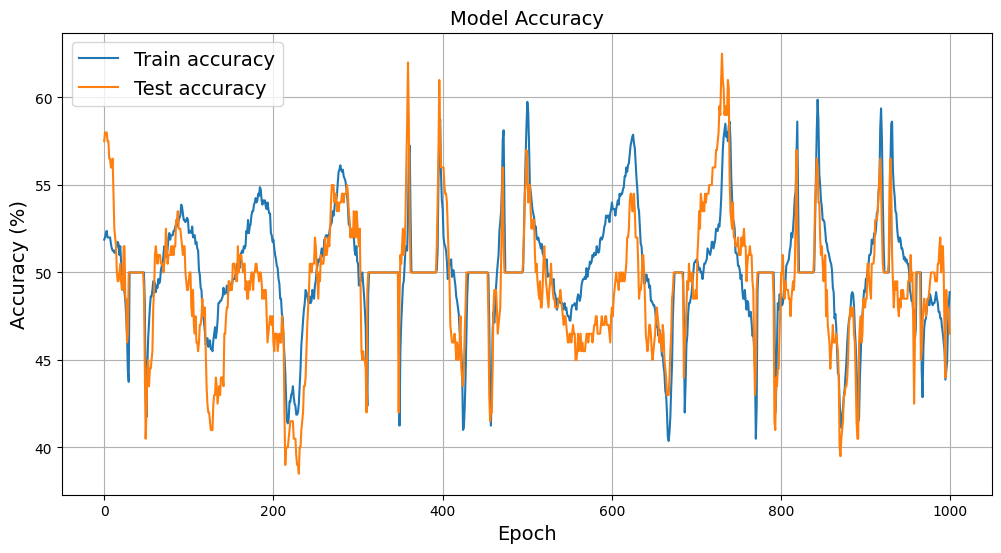

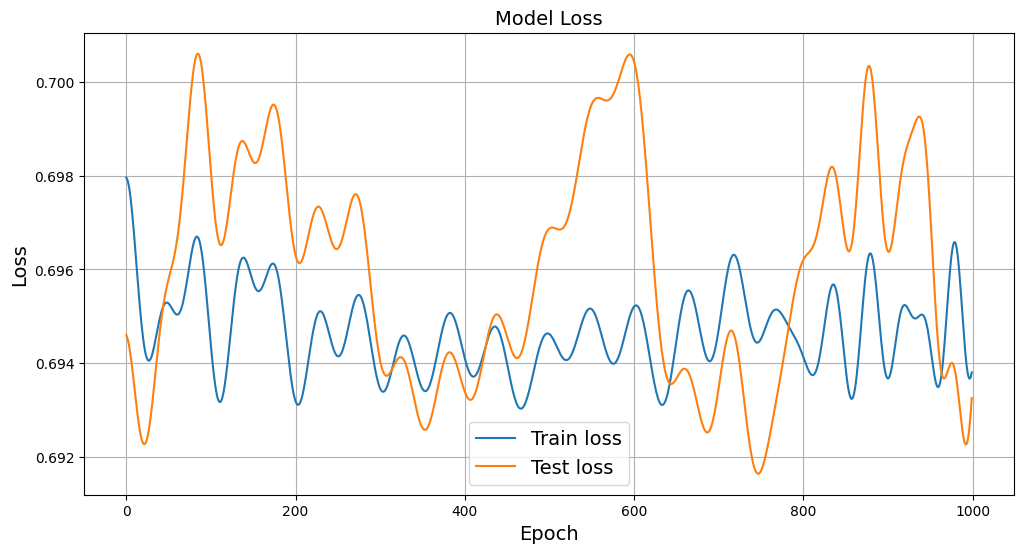

In [ ]:
# prompt: Call plot stuff on the collected data. Remember that it's currently in the gpu and in form of tensors. Remember to move the data to cpu in case int's in the cuda device

epoch_count = torch.tensor(epoch_count)
accuracy = torch.tensor(accuracy)
losses = torch.tensor(losses)
test_losses = torch.tensor(test_losses)
test_accuracy = torch.tensor(test_accuracy)

epoch_count = epoch_count.cpu().numpy()
accuracy = accuracy.cpu().numpy()
losses = losses.cpu().numpy()
test_losses = test_losses.cpu().numpy()
test_accuracy = test_accuracy.cpu().numpy()

plot_stuff(epochs, accuracy, losses, test_losses, test_accuracy, epoch_count)


## The missing piece: non-linearity

The current model can only see straight lines. It needs non-linear constructs to see circles and other non-linear shapes

### Recreating non-linear data (red and blue circles)

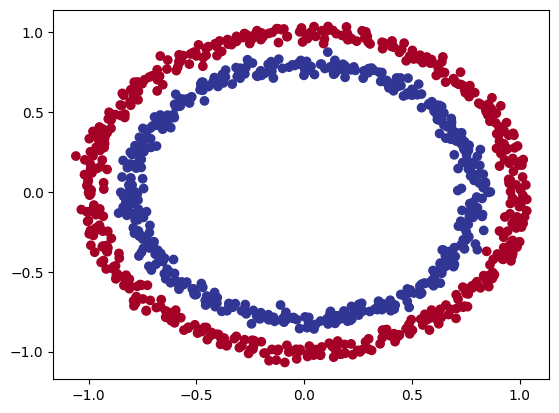

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:, 0], X[:, 1],c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)

# Split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], X_test[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]))

###  Building a model with non-linearity

In [ ]:
# Making the model with non-linear layers
from torch import nn


class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [ ]:
# Instantiating the model and naming it 3
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.0001)

### Training the model with non-linearity

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 5566

accuracy = []
losses = []
test_losses = []
test_accuracy = []
epoch_count = []

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_3.train()

    # Predict
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    # Lossprint(f"Length of test samples: {len(Xprint
    loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
    # Accuracy
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    # Optimizer zero grad
    loss.backward()
    # Optimizer step
    optimizer.step()
    accuracy.append(acc)
    losses.append(loss)
    epoch_count.append(epoch)


    ### Testing
    model_3.eval()
    with torch.inference_mode():
        # Predict
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        test_losses.append(test_loss)
        test_accuracy.append(test_acc)
    if epoch %1 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")



Streaming output truncated to the last 5000 lines.
Epoch: 566 | Loss: 0.69060, Acc: 50.62% | Test loss: 0.69034 | Test acc: 50.50%
Epoch: 567 | Loss: 0.69059, Acc: 50.62% | Test loss: 0.69033 | Test acc: 50.50%
Epoch: 568 | Loss: 0.69059, Acc: 50.62% | Test loss: 0.69032 | Test acc: 50.50%
Epoch: 569 | Loss: 0.69058, Acc: 50.62% | Test loss: 0.69031 | Test acc: 50.50%
Epoch: 570 | Loss: 0.69058, Acc: 50.88% | Test loss: 0.69031 | Test acc: 50.50%
Epoch: 571 | Loss: 0.69057, Acc: 50.88% | Test loss: 0.69030 | Test acc: 50.50%
Epoch: 572 | Loss: 0.69056, Acc: 50.88% | Test loss: 0.69029 | Test acc: 51.00%
Epoch: 573 | Loss: 0.69056, Acc: 51.12% | Test loss: 0.69028 | Test acc: 51.50%
Epoch: 574 | Loss: 0.69055, Acc: 51.12% | Test loss: 0.69028 | Test acc: 51.50%
Epoch: 575 | Loss: 0.69054, Acc: 51.00% | Test loss: 0.69027 | Test acc: 51.50%
Epoch: 576 | Loss: 0.69054, Acc: 50.88% | Test loss: 0.69026 | Test acc: 51.50%
Epoch: 577 | Loss: 0.69053, Acc: 50.62% | Test loss: 0.69025 | Test a

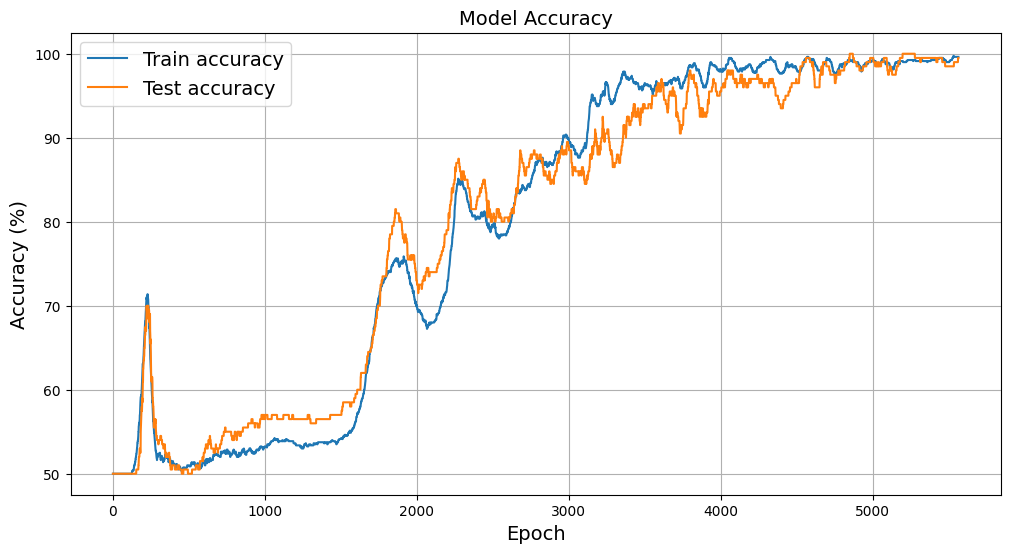

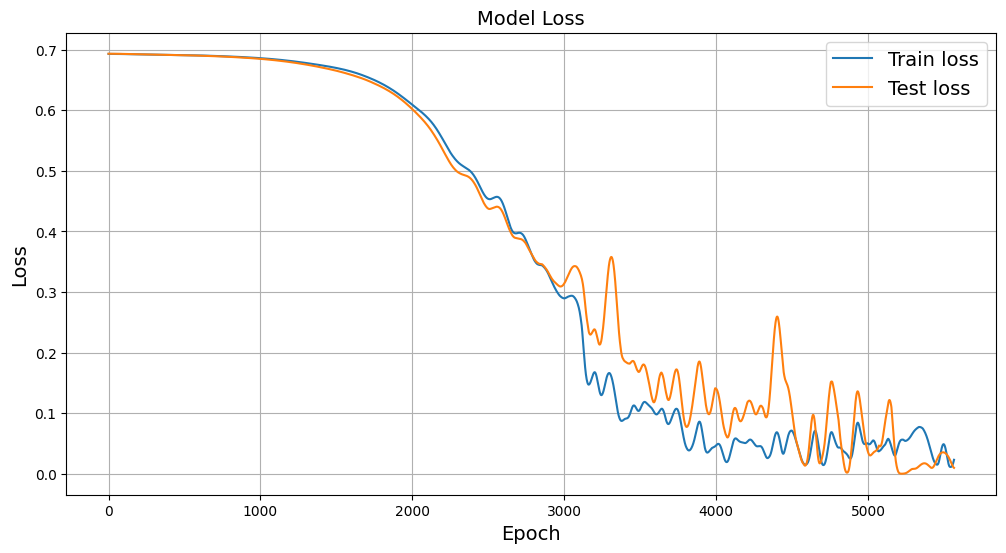

In [ ]:
# prompt: move the data to the cpu, turn it into numpy arrays and plot it using plot stuff

epoch_count = torch.tensor(epoch_count).cpu().numpy()
accuracy = torch.tensor(accuracy).cpu().numpy()
losses = torch.tensor(losses).cpu().numpy()
test_losses = torch.tensor(test_losses).cpu().numpy()
test_accuracy = torch.tensor(test_accuracy).cpu().numpy()

plot_stuff(epochs, accuracy, losses, test_losses, test_accuracy, epoch_count)


### Evaluating a model trained non-linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

NameError: name 'plot_decision_boundary' is not defined

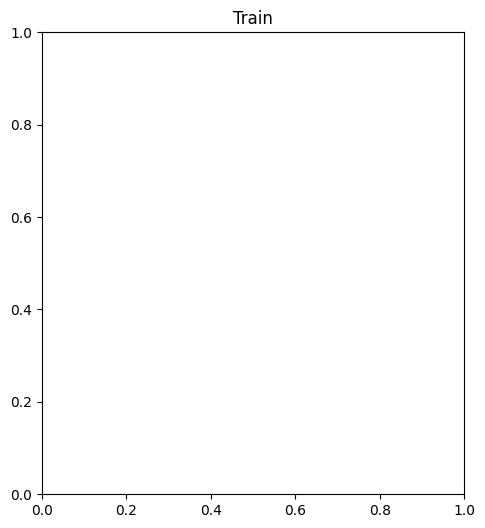

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and its tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float)
A.dtype

In [ ]:
# Visualize the tensor
plt.plot(A)

In [ ]:
# Pass it through the ReLU
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.max(torch.tensor(0), x)

In [ ]:
plt.plot(relu(A))

In [ ]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
    return 1 / (1 + torch.exp(-x))

In [ ]:
plt.plot(sigmoid(A))

## Putting it all together with a multi-class classification problem

- Binary classification = one thing or another (cat vs. dog, spam vs not spam, fraud vs not fraud)
- Multi-class classification = more than two classes (cat vs. dog vs. chicken)

### Creating a toy multi-class dataset

In [ ]:
!apt update
!apt install python3-sklearn -y
!apt full-upgrade -y

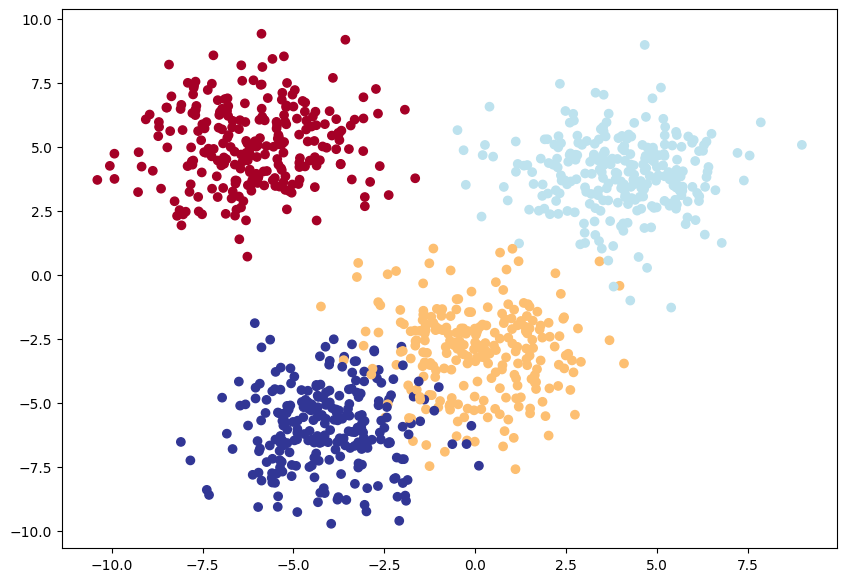

In [ ]:
# Import dependancies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
CLUSTER_CENTERS = [(-6, 5), (0, -3), (4, 4), (-4, -6)]
NUM_FEATURES = 2
RANDOM_SEED = 223


# Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=CLUSTER_CENTERS,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)
# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# 3. Split into train and text
X_blob_train, X_blot_test, y_blob_train, y_blob_text = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)
# 4. Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)